**Importing the Libraries**

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM

**Loading the data**

In [2]:
# Load dataset
df = pd.read_csv('/content/COCO COLA.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.263021,0.270182,0.263021,0.263021,0.051133,806400
1,1962-01-03,0.259115,0.259115,0.253255,0.257161,0.049994,1574400
2,1962-01-04,0.257813,0.261068,0.257813,0.259115,0.050374,844800
3,1962-01-05,0.259115,0.262370,0.252604,0.253255,0.049234,1420800
4,1962-01-08,0.251302,0.251302,0.245768,0.250651,0.048728,2035200


In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
df.index

RangeIndex(start=0, stop=15096, step=1)

In [6]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
15091,2021-12-13,56.980000,57.930000,56.959999,57.759998,57.759998,31362800
15092,2021-12-14,57.400002,58.169998,57.400002,57.799999,57.799999,24806600
15093,2021-12-15,57.930000,58.250000,57.650002,58.060001,58.060001,24923800
15094,2021-12-16,57.980000,58.880001,57.900002,58.650002,58.650002,24696900
15095,2021-12-17,58.490002,58.919998,57.700001,57.730000,57.730000,51874400


In [7]:
df.shape

(15096, 7)

**Exploratory Data Analysis (EDA)**

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15096 entries, 0 to 15095
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       15096 non-null  object 
 1   Open       15096 non-null  float64
 2   High       15096 non-null  float64
 3   Low        15096 non-null  float64
 4   Close      15096 non-null  float64
 5   Adj Close  15096 non-null  float64
 6   Volume     15096 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 825.7+ KB
None


In [9]:
print(df.describe())

               Open          High           Low         Close     Adj Close  \
count  15096.000000  15096.000000  15096.000000  15096.000000  15096.000000   
mean      16.056202     16.188428     15.921876     16.060734     11.367487   
std       16.939301     17.064336     16.811753     16.941712     14.253637   
min        0.192708      0.193359      0.182292      0.192057      0.037855   
25%        0.860677      0.869792      0.854167      0.860352      0.242312   
50%        9.328125      9.398438      9.218750      9.351562      4.642848   
75%       28.875000     29.167500     28.563125     28.901562     17.251080   
max       59.810001     60.130001     59.619999     60.130001     58.650002   

             Volume  
count  1.509600e+04  
mean   9.032904e+06  
std    7.935744e+06  
min    7.680000e+04  
25%    2.812800e+06  
50%    7.585200e+06  
75%    1.291275e+07  
max    1.241690e+08  


In [11]:
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


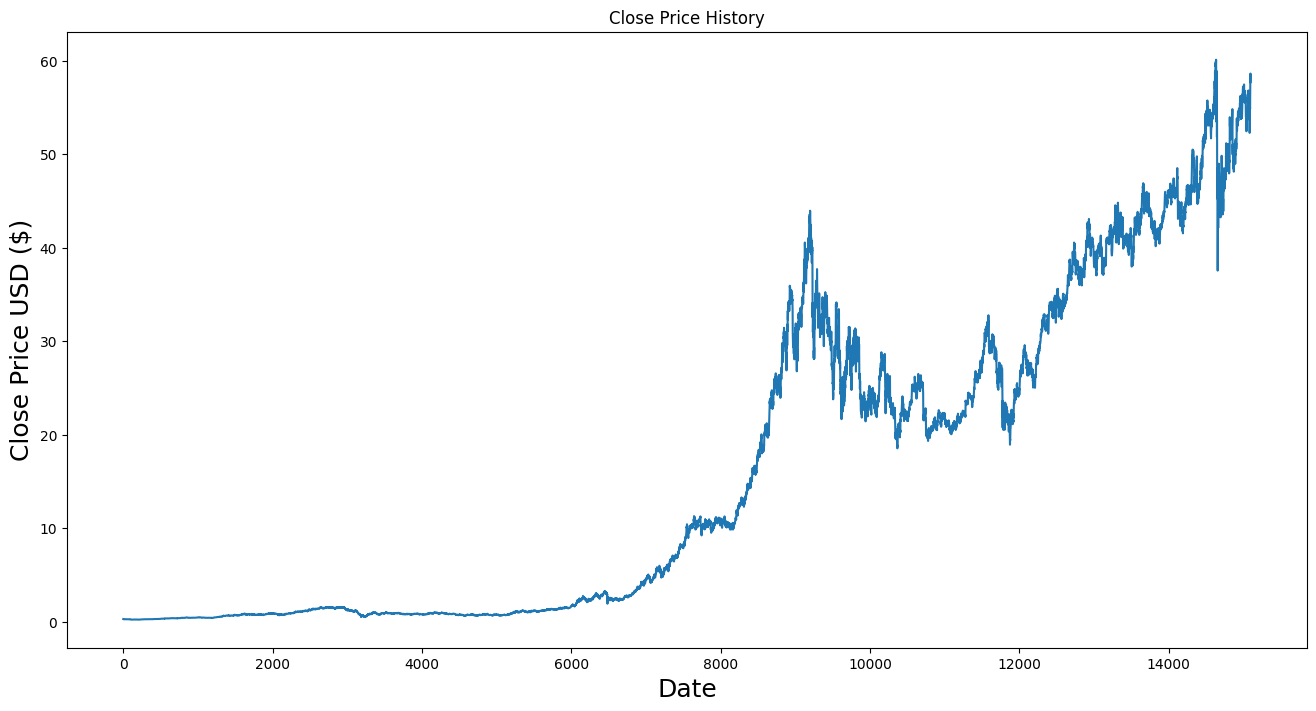

In [10]:
# Visualizing the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

**Preprocessing Data**

In [12]:
# Using the 'Close' column for prediction
data = df.filter(['Close'])
dataset = data.values

**LSTM Model**

In [13]:
# Scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

**Splitting the data into training and testing sets**

In [14]:
# Splitting the data into training and testing sets
train_size = int(len(dataset) * 0.8)
train_data = scaled_data[0:train_size, :]
test_data = scaled_data[train_size - 60:, :]

# Preparing the data for LSTM model
def create_dataset(data, look_back=60):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 60
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

In [16]:
# Reshape input to be [samples, time steps, features] for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

**Training and Building the LSTM Model**

In [15]:
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dense(25))
lstm_model.add(Dense(1))

In [17]:
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, batch_size=1, epochs=1)

12016/12016 [==============================] - 417s 34ms/step - loss: 2.8368e-04


**Evaluating the Model**

In [18]:
lstm_predictions = lstm_model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

rmse = np.sqrt(np.mean(((lstm_predictions - y_test) ** 2)))
print('LSTM Model RMSE:', rmse)

95/95 [==============================] - 3s 20ms/step
LSTM Model RMSE: 41.03262843680386


**Visualizing the Results**

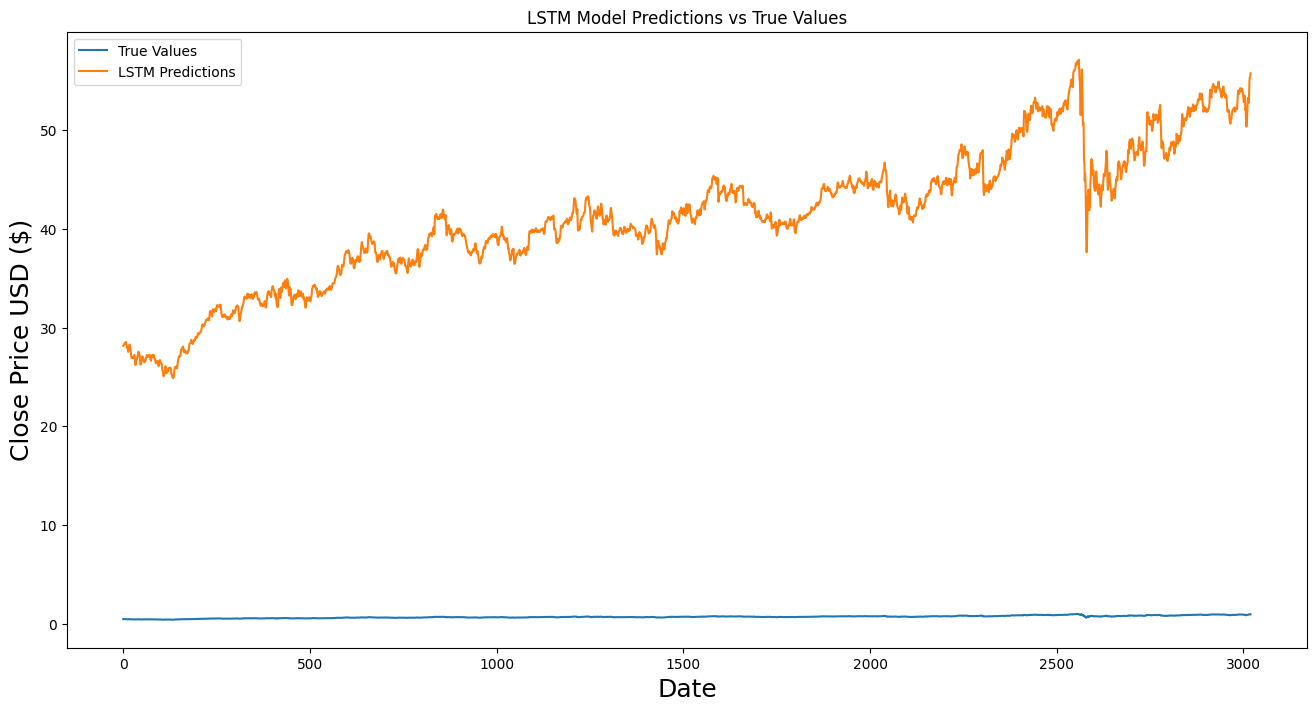

In [19]:
# Visualizing the Results for LSTM
plt.figure(figsize=(16,8))
plt.title('LSTM Model Predictions vs True Values')
plt.plot(y_test, label='True Values')
plt.plot(lstm_predictions, label='LSTM Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()

**SVR Model**

In [20]:
# Preparing the data for SVR model
X = data.index.values.reshape(-1, 1)
y = data['Close'].values

In [21]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [22]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# Training the SVR Model
svr_model = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_model.fit(X_train_scaled, y_train)

SVR(C=1000.0, gamma=0.1)

In [24]:
# Predicting and evaluating the SVR model
svr_predictions = svr_model.predict(X_test_scaled)
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_predictions))
print('SVR Model RMSE:', svr_rmse)

SVR Model RMSE: 59.73867456626808


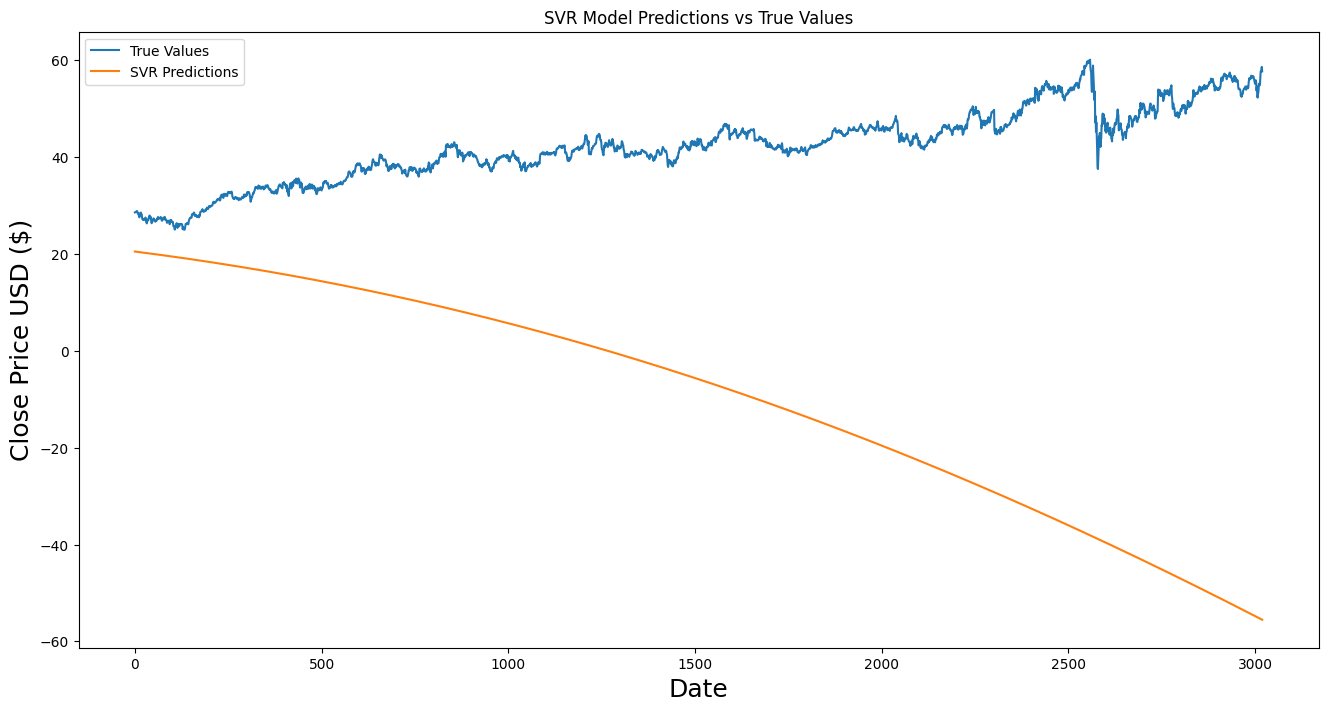

In [25]:
# Visualizing the Results for SVR
plt.figure(figsize=(16,8))
plt.title('SVR Model Predictions vs True Values')
plt.plot(y_test, label='True Values')
plt.plot(svr_predictions, label='SVR Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()

**SGD Regressor Model**

In [26]:
# Preparing the data for SGD Regressor model
X = data.index.values.reshape(-1, 1)
y = data['Close'].values

In [27]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [28]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
# Training the SGD Regressor Model
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3)
sgd_model.fit(X_train_scaled, y_train)

SGDRegressor()

In [30]:
# Predicting and evaluating the SGD model
sgd_predictions = sgd_model.predict(X_test_scaled)
sgd_rmse = np.sqrt(mean_squared_error(y_test, sgd_predictions))
print('SGD Model RMSE:', sgd_rmse)

SGD Model RMSE: 13.113406145932162


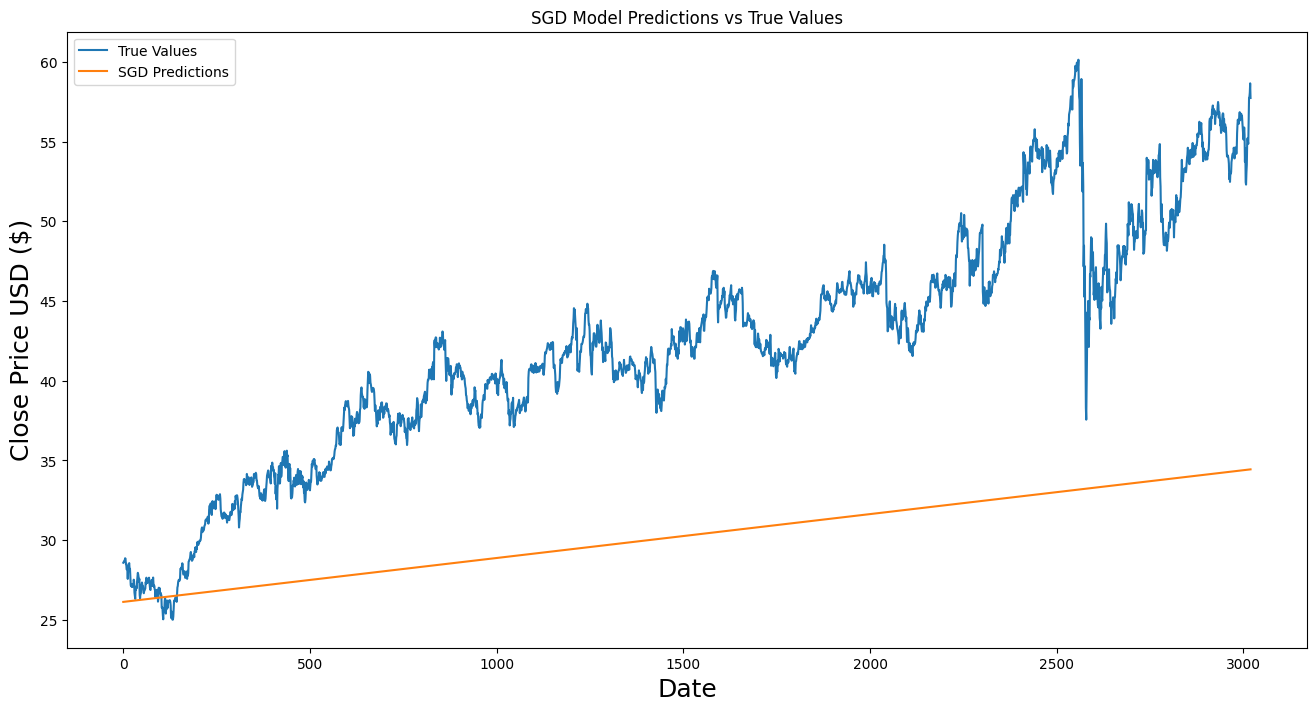

In [31]:
# Visualizing the Results for SGD
plt.figure(figsize=(16,8))
plt.title('SGD Model Predictions vs True Values')
plt.plot(y_test, label='True Values')
plt.plot(sgd_predictions, label='SGD Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()

**Decision Tree Regressor Model**

In [32]:
# Preparing the data for Decision Tree Regressor model
X = data.index.values.reshape(-1, 1)
y = data['Close'].values

In [33]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Training the Decision Tree Regressor Model
dtr_model = DecisionTreeRegressor()
dtr_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [34]:
# Predicting and evaluating the Decision Tree model
dtr_predictions = dtr_model.predict(X_test)
dtr_rmse = np.sqrt(mean_squared_error(y_test, dtr_predictions))
print('Decision Tree Model RMSE:', dtr_rmse)

Decision Tree Model RMSE: 15.709184025994118


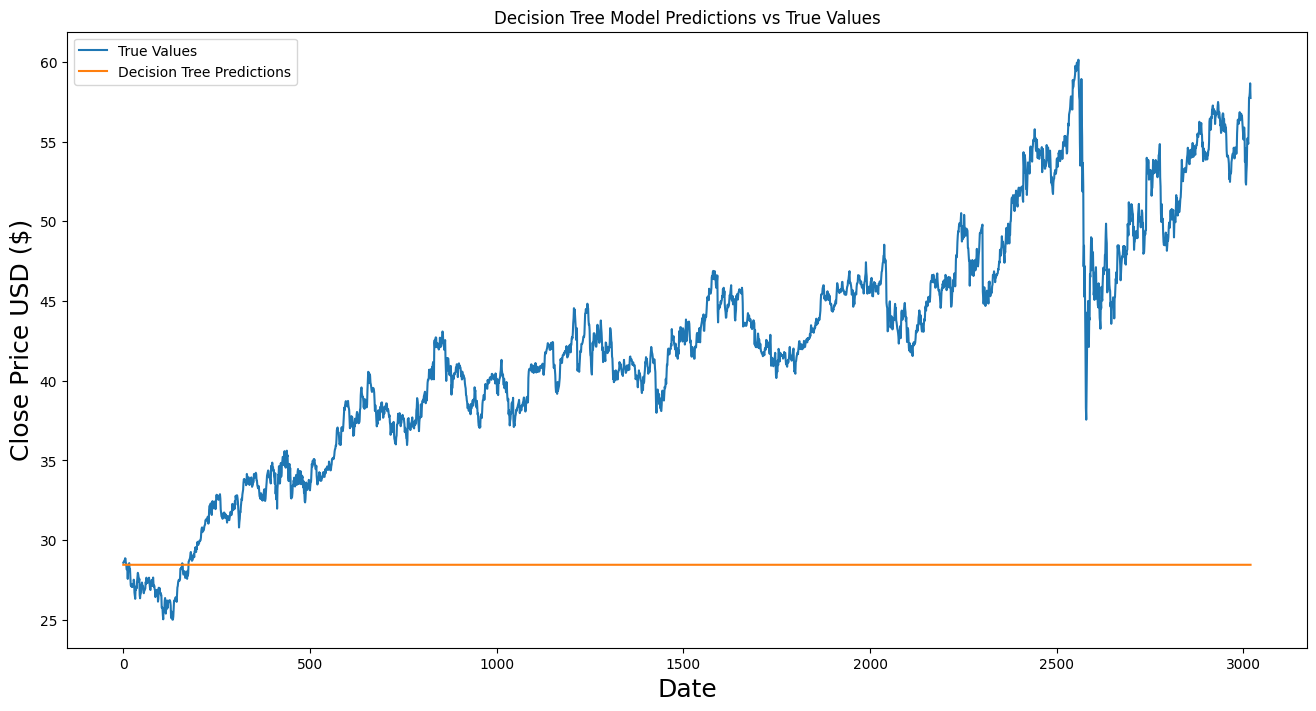

In [35]:
# Visualizing the Results for Decision Tree
plt.figure(figsize=(16,8))
plt.title('Decision Tree Model Predictions vs True Values')
plt.plot(y_test, label='True Values')
plt.plot(dtr_predictions, label='Decision Tree Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()

**Random Forest Regressor Model**

In [36]:
# Preparing the data for Random Forest Regressor model
X = data.index.values.reshape(-1, 1)
y = data['Close'].values

In [37]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Training the Random Forest Regressor Model
rfr_model = RandomForestRegressor(n_estimators=100)
rfr_model.fit(X_train, y_train)

RandomForestRegressor()

In [38]:
# Predicting and evaluating the Random Forest model
rfr_predictions = rfr_model.predict(X_test)
rfr_rmse = np.sqrt(mean_squared_error(y_test, rfr_predictions))
print('Random Forest Model RMSE:', rfr_rmse)

Random Forest Model RMSE: 15.616620021023364


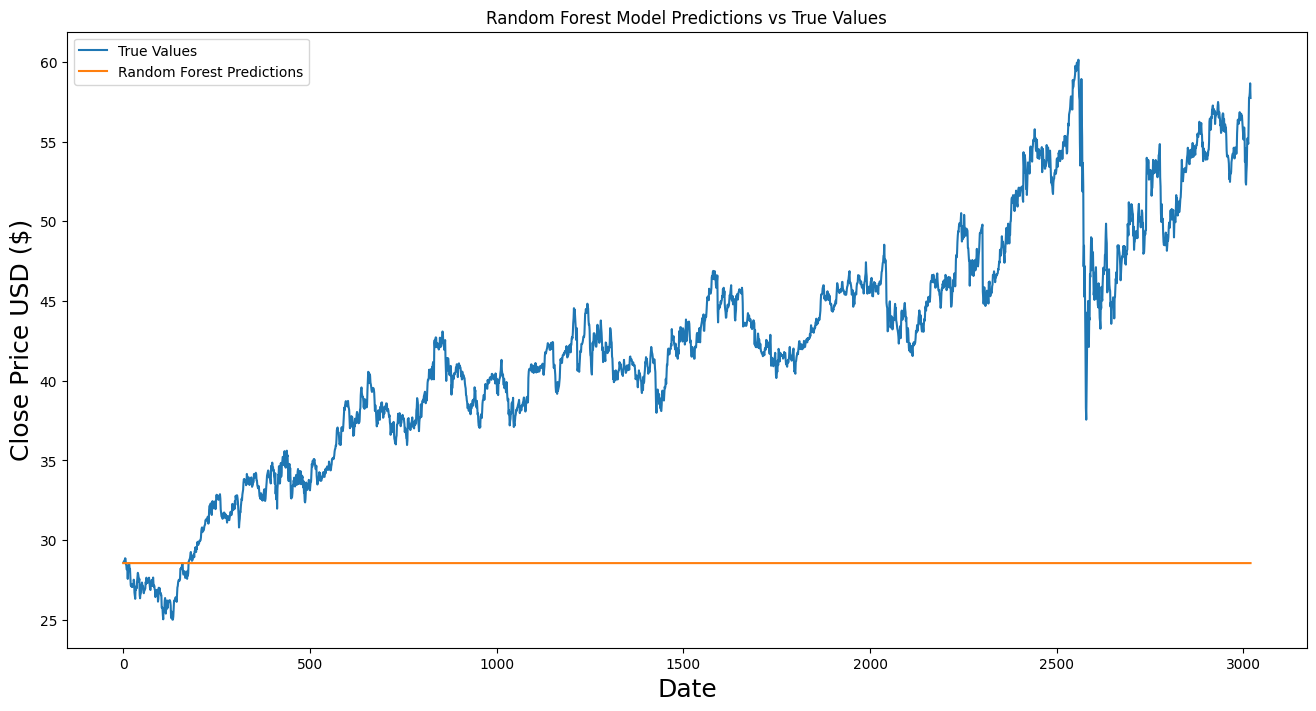

In [39]:
# Visualizing the Results for Random Forest
plt.figure(figsize=(16,8))
plt.title('Random Forest Model Predictions vs True Values')
plt.plot(y_test, label='True Values')
plt.plot(rfr_predictions, label='Random Forest Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()